In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2

## Image Segmentation

In [2]:
def segmentation(image, clusters, attempts):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img_in = img.reshape((-1,3))
    img_in = np.float32(img_in)
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    
    K = clusters
    attempts = attempts
    ret, label, center = cv2.kmeans(
        img_in,
        K,
        None,
        criteria,
        attempts,
        cv2.KMEANS_PP_CENTERS
    )
    
    center = np.uint8(center)
    
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    
    plt.figure(figsize=(12,18))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.subplot(1,2,2)
    plt.imshow(result_image)
    plt.title('K-Means Clustering')

    return(result_image, label.reshape((result_image.shape[0], result_image.shape[1])))

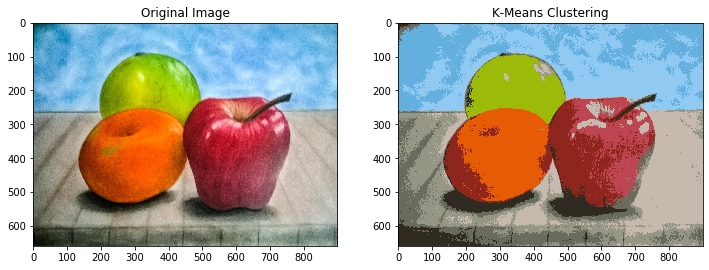

In [3]:
image, label = segmentation(
    image = 'frutas.jpg',
    clusters = 10, 
    attempts = 10
)

### Defining the function to extrac a specific label in the image

In [20]:
def image_extraction_by_clustering(image, label, key):
    #Creating an empty matrix for thresholding the result image
    filtered_matrix = np.zeros_like(image, dtype = np.uint8)
    
    #Filtering the label by the specified key
    filtered_matrix[label==key] = image[label==key]
    
    return(filtered_matrix)

#### Labels in the cluster:

In [21]:
np.unique(label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

### Extracting an orange using the Label = 1

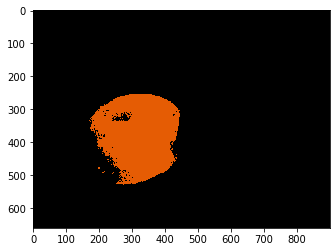

In [22]:
plt.imshow(
    image_extraction_by_clustering(
        image = image, 
        label = label, 
        key = 1
    )
)

### Extracting an apple using the Label = 5

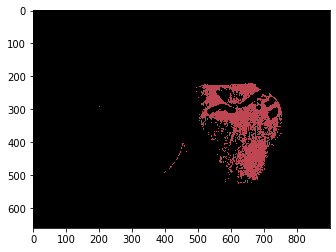

In [23]:
plt.imshow(
    image_extraction_by_clustering(
        image = image, 
        label = label, 
        key = 5
    )
)